# SBANN
## ~~Standard boring ass neural network~~
## Size and Batch Adaptable Neural Network

Import necessary packages

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

2023-05-17 11:48:13.865759: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Data

Define core features of the dataset

In [2]:
dim = 3
numpart = 30
latent_dim = 4

Import and reshape data

In [3]:
fname="/Users/lorenzobarbiero/Downloads/test_30_5_0.05_0.3_0.1_10000_1000_1000_x.txt"
with open(fname) as f:
    data = [
        [float(i.strip()) for i in s.split(" ") if i != ""]
        for s in f.read().split("\n")
        if s != ""]

In [4]:
print(data[1])

[3.336635, 3.919305, 2.734692, 2.592749, 4.251143, 1.946005, 2.569278, 3.558946, 1.099535, 1.667399, 3.546641, 1.910742, 3.946726, 3.046994, 3.533433, 3.616621, 4.690143, 2.065708, 2.188258, 2.073205, 3.390317, 2.870971, 1.58392, 1.38977, 0.881777, 3.249116, 2.602235, 3.601859, 3.606766, 1.670101, 3.70629, 2.790531, 2.431922, 1.024758, 2.594398, 1.747097, 3.518145, 2.076213, 3.334007, 1.493373, 1.851869, 2.595559, 2.699221, 3.27198, 2.19975, 3.862038, 1.674536, 2.120486, 2.676059, 2.141204, 2.371591, 4.356798, 3.745405, 2.542581, 4.051411, 2.062422, 1.172846, 1.13258, 2.598437, 3.509392, 2.092019, 2.509008, 1.536048, 1.824886, 2.864364, 2.783008, 4.619022, 2.99871, 1.713088, 2.896652, 2.9207, 3.160665, 2.252266, 3.891109, 2.91944, 1.303496, 3.737969, 3.581262, 3.164782, 2.567627, 1.428368, 2.143883, 3.1519, 3.877689, 3.152608, 2.577253, 4.17173, 3.995555, 3.055175, 0.792308]


In [5]:
vcs = np.array(data).reshape((-1,numpart,dim))
#vcs = np.array(data)
print(vcs.shape,vcs[1])

(10000, 30, 3) [[3.336635 3.919305 2.734692]
 [2.592749 4.251143 1.946005]
 [2.569278 3.558946 1.099535]
 [1.667399 3.546641 1.910742]
 [3.946726 3.046994 3.533433]
 [3.616621 4.690143 2.065708]
 [2.188258 2.073205 3.390317]
 [2.870971 1.58392  1.38977 ]
 [0.881777 3.249116 2.602235]
 [3.601859 3.606766 1.670101]
 [3.70629  2.790531 2.431922]
 [1.024758 2.594398 1.747097]
 [3.518145 2.076213 3.334007]
 [1.493373 1.851869 2.595559]
 [2.699221 3.27198  2.19975 ]
 [3.862038 1.674536 2.120486]
 [2.676059 2.141204 2.371591]
 [4.356798 3.745405 2.542581]
 [4.051411 2.062422 1.172846]
 [1.13258  2.598437 3.509392]
 [2.092019 2.509008 1.536048]
 [1.824886 2.864364 2.783008]
 [4.619022 2.99871  1.713088]
 [2.896652 2.9207   3.160665]
 [2.252266 3.891109 2.91944 ]
 [1.303496 3.737969 3.581262]
 [3.164782 2.567627 1.428368]
 [2.143883 3.1519   3.877689]
 [3.152608 2.577253 4.17173 ]
 [3.995555 3.055175 0.792308]]


## Sorting data


In [6]:
sortmode = 3

### Option 1 - x sorted cartesian coords

In [7]:
if sortmode == 1 :
    idx = np.lexsort((vcs[:,:,1], vcs[:,:,0]))
    
    # Use the indices to sort each step while maintaining the rows intact
    sorted_vcs = np.empty_like(vcs)
    for i in range(len(vcs)):
        sorted_vcs[i] = vcs[i][idx[i]]
            
    print(sorted_vcs.shape,"\n",sorted_vcs[1])

### Option 2 - distance from center sorted cartesian coords

In [8]:
if sortmode == 2 :
    def sort_by_distance_from_center(points):
        #center = np.mean(points, axis=0)
        distances = np.linalg.norm(points, axis=1)
        sorted_indices = np.argsort(distances)
        sorted_points = points[sorted_indices]
        return sorted_points

    for i in range (len(vcs)):
        vcs[i,:,:] = sort_by_distance_from_center(vcs[i,:,:])
    print(vcs.shape, vcs[1])

### Option 3 - Monke sorting

In [9]:
if sortmode == 3 :
    def convert_to_spherical_coordinates(cartesian_coords):
        x, y, z = cartesian_coords[:, 0], cartesian_coords[:, 1], cartesian_coords[:, 2]
    
        r = np.sqrt(x**2 + y**2 + z**2)
        theta = np.arccos(z / r)
        phi = np.arctan2(y, x)
    
        spherical_coords = np.column_stack((r, theta, phi))
        return spherical_coords

    for i in range(len(vcs)):
        vcs[i,:,:] = convert_to_spherical_coordinates(vcs[i,:,:])

### Reshape and train/test split

In [10]:
vcs = vcs.reshape((-1,90))
print(vcs.shape,"\n",vcs[1])

(10000, 90) 
 [5.82860405 1.08242897 0.8655287  5.34616682 1.19823735 1.02313316
 4.52507053 1.32535199 0.94550925 4.36002486 1.11715543 1.13132512
 6.1111347  0.95428056 0.65745237 6.27252249 1.23520611 0.91392049
 4.53661784 0.72677287 0.75840625 3.56128315 1.16989955 0.50414887
 4.25510428 0.91277046 1.30578956 5.36389659 1.25417285 0.78607888
 5.23811927 1.08798172 0.64536576 3.29140971 1.01124609 1.19461745
 5.2729126  0.88629152 0.5331411  3.52086754 0.74188972 0.89215666
 4.77813219 1.09237465 0.88102583 4.71337132 1.10415716 0.4091228
 4.16779201 0.96547279 0.67482224 6.28287081 1.15416244 0.71008081
 4.69500621 1.31831527 0.47087141 4.5111467  0.67941902 1.15975507
 3.60986261 1.13126625 0.87578079 4.39089098 0.88432214 1.00354324
 5.76734743 1.26921324 0.57581886 5.1875702  0.91564837 0.78953198
 5.36064934 0.99487746 1.0460932  5.33825361 0.83541806 1.23526431
 4.31842433 1.23368607 0.68160081 5.43757114 0.77684495 0.97349146
 5.82962275 0.77330087 0.68532019 5.0917881  1.41

Split in training and test set

In [11]:
train_perc=0.8
trainset = vcs[:int(train_perc*len(data))]
print(trainset.shape)
testset = vcs[int(train_perc*len(data)):]
print(testset.shape)

(8000, 90)
(2000, 90)


### Sampling class

In [12]:
class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

### Encoder

In [13]:
input_shape = (numpart*dim)
inputs = layers.Input(shape=input_shape)
x = layers.Dense(int(numpart*dim*4/5), activation='relu')(inputs)
x = layers.Dense(int(numpart*dim*3/5), activation='relu')(x)
x = layers.Dense(int(numpart*dim*2/5), activation='relu')(x)
x = layers.Dense(int(numpart*dim*1/5), activation='relu')(x)
z_mean = layers.Dense(latent_dim, name='z_mean')(x)
z_log_var = layers.Dense(latent_dim, name='z_log_var')(x)
z = Sampling()([z_mean, z_log_var])
encoder = keras.Model(inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 90)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 72)           6552        ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 54)           3942        ['dense[0][0]']                  
                                                                                                  
 dense_2 (Dense)                (None, 36)           1980        ['dense_1[0][0]']                
                                                                                            

2023-05-17 11:48:18.285671: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Decoder

In [14]:
latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(int(numpart*dim*1/5), activation="relu")(latent_inputs)
x = layers.Dense(int(numpart*dim*2/5), activation="relu")(x)
x = layers.Dense(int(numpart*dim*3/5), activation="relu")(x)
x = layers.Dense(int(numpart*dim*4/5), activation="relu")(x)
decoder_outputs = layers.Dense(numpart*dim)(x)
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_4 (Dense)             (None, 18)                90        
                                                                 
 dense_5 (Dense)             (None, 36)                684       
                                                                 
 dense_6 (Dense)             (None, 54)                1998      
                                                                 
 dense_7 (Dense)             (None, 72)                3960      
                                                                 
 dense_8 (Dense)             (None, 90)                6570      
                                                                 
Total params: 13,302
Trainable params: 13,302
Non-trainable

### VAE Class

In [15]:
class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean(
                keras.losses.mean_squared_error(data, reconstruction)
            )
            kl_loss = -0.5 * (
                1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
            )
            kl_loss = tf.reduce_mean(kl_loss)
            total_loss = reconstruction_loss + reg_lambda * kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

### Train VAE

In [16]:
reg_lambda=0
vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001)) #lower learning rate
fit=vae.fit(trainset, epochs=300, batch_size=128, verbose=2)

Epoch 1/300
63/63 - 1s - loss: 7.4476 - reconstruction_loss: 7.4476 - kl_loss: 3.3522 - 618ms/epoch - 10ms/step
Epoch 2/300
63/63 - 0s - loss: 4.5683 - reconstruction_loss: 4.5683 - kl_loss: 34.7031 - 84ms/epoch - 1ms/step
Epoch 3/300
63/63 - 0s - loss: 1.6254 - reconstruction_loss: 1.6254 - kl_loss: 67.8366 - 84ms/epoch - 1ms/step
Epoch 4/300
63/63 - 0s - loss: 0.6710 - reconstruction_loss: 0.6710 - kl_loss: 80.4002 - 85ms/epoch - 1ms/step
Epoch 5/300
63/63 - 0s - loss: 0.3977 - reconstruction_loss: 0.3977 - kl_loss: 88.6167 - 85ms/epoch - 1ms/step
Epoch 6/300
63/63 - 0s - loss: 0.3392 - reconstruction_loss: 0.3392 - kl_loss: 93.2223 - 84ms/epoch - 1ms/step
Epoch 7/300
63/63 - 0s - loss: 0.3309 - reconstruction_loss: 0.3309 - kl_loss: 95.4123 - 84ms/epoch - 1ms/step
Epoch 8/300
63/63 - 0s - loss: 0.3297 - reconstruction_loss: 0.3297 - kl_loss: 96.1727 - 84ms/epoch - 1ms/step
Epoch 9/300
63/63 - 0s - loss: 0.3290 - reconstruction_loss: 0.3290 - kl_loss: 96.5211 - 85ms/epoch - 1ms/step


Epoch 74/300
63/63 - 0s - loss: 0.3046 - reconstruction_loss: 0.3046 - kl_loss: 108.4946 - 81ms/epoch - 1ms/step
Epoch 75/300
63/63 - 0s - loss: 0.3042 - reconstruction_loss: 0.3042 - kl_loss: 108.6487 - 91ms/epoch - 1ms/step
Epoch 76/300
63/63 - 0s - loss: 0.3036 - reconstruction_loss: 0.3036 - kl_loss: 108.9928 - 82ms/epoch - 1ms/step
Epoch 77/300
63/63 - 0s - loss: 0.3034 - reconstruction_loss: 0.3034 - kl_loss: 109.1770 - 84ms/epoch - 1ms/step
Epoch 78/300
63/63 - 0s - loss: 0.3029 - reconstruction_loss: 0.3029 - kl_loss: 109.3691 - 86ms/epoch - 1ms/step
Epoch 79/300
63/63 - 0s - loss: 0.3025 - reconstruction_loss: 0.3025 - kl_loss: 109.5730 - 84ms/epoch - 1ms/step
Epoch 80/300
63/63 - 0s - loss: 0.3024 - reconstruction_loss: 0.3024 - kl_loss: 109.8411 - 83ms/epoch - 1ms/step
Epoch 81/300
63/63 - 0s - loss: 0.3020 - reconstruction_loss: 0.3020 - kl_loss: 109.9623 - 90ms/epoch - 1ms/step
Epoch 82/300
63/63 - 0s - loss: 0.3017 - reconstruction_loss: 0.3017 - kl_loss: 110.1987 - 84ms/

63/63 - 0s - loss: 0.2958 - reconstruction_loss: 0.2958 - kl_loss: 109.7629 - 84ms/epoch - 1ms/step
Epoch 147/300
63/63 - 0s - loss: 0.2956 - reconstruction_loss: 0.2956 - kl_loss: 109.6377 - 83ms/epoch - 1ms/step
Epoch 148/300
63/63 - 0s - loss: 0.2958 - reconstruction_loss: 0.2958 - kl_loss: 109.4996 - 83ms/epoch - 1ms/step
Epoch 149/300
63/63 - 0s - loss: 0.2955 - reconstruction_loss: 0.2955 - kl_loss: 109.4410 - 82ms/epoch - 1ms/step
Epoch 150/300
63/63 - 0s - loss: 0.2956 - reconstruction_loss: 0.2956 - kl_loss: 109.3339 - 83ms/epoch - 1ms/step
Epoch 151/300
63/63 - 0s - loss: 0.2958 - reconstruction_loss: 0.2958 - kl_loss: 109.2344 - 83ms/epoch - 1ms/step
Epoch 152/300
63/63 - 0s - loss: 0.2956 - reconstruction_loss: 0.2956 - kl_loss: 109.0486 - 83ms/epoch - 1ms/step
Epoch 153/300
63/63 - 0s - loss: 0.2955 - reconstruction_loss: 0.2955 - kl_loss: 108.9624 - 83ms/epoch - 1ms/step
Epoch 154/300
63/63 - 0s - loss: 0.2955 - reconstruction_loss: 0.2955 - kl_loss: 108.8458 - 83ms/epoch

Epoch 218/300
63/63 - 0s - loss: 0.2948 - reconstruction_loss: 0.2948 - kl_loss: 100.3655 - 84ms/epoch - 1ms/step
Epoch 219/300
63/63 - 0s - loss: 0.2947 - reconstruction_loss: 0.2947 - kl_loss: 100.2563 - 83ms/epoch - 1ms/step
Epoch 220/300
63/63 - 0s - loss: 0.2948 - reconstruction_loss: 0.2948 - kl_loss: 100.1079 - 83ms/epoch - 1ms/step
Epoch 221/300
63/63 - 0s - loss: 0.2947 - reconstruction_loss: 0.2947 - kl_loss: 99.9875 - 82ms/epoch - 1ms/step
Epoch 222/300
63/63 - 0s - loss: 0.2946 - reconstruction_loss: 0.2946 - kl_loss: 99.8857 - 83ms/epoch - 1ms/step
Epoch 223/300
63/63 - 0s - loss: 0.2946 - reconstruction_loss: 0.2946 - kl_loss: 99.7116 - 82ms/epoch - 1ms/step
Epoch 224/300
63/63 - 0s - loss: 0.2947 - reconstruction_loss: 0.2947 - kl_loss: 99.5750 - 82ms/epoch - 1ms/step
Epoch 225/300
63/63 - 0s - loss: 0.2947 - reconstruction_loss: 0.2947 - kl_loss: 99.4762 - 83ms/epoch - 1ms/step
Epoch 226/300
63/63 - 0s - loss: 0.2946 - reconstruction_loss: 0.2946 - kl_loss: 99.3640 - 83

Epoch 291/300
63/63 - 0s - loss: 0.2939 - reconstruction_loss: 0.2939 - kl_loss: 92.3161 - 84ms/epoch - 1ms/step
Epoch 292/300
63/63 - 0s - loss: 0.2939 - reconstruction_loss: 0.2939 - kl_loss: 92.2537 - 82ms/epoch - 1ms/step
Epoch 293/300
63/63 - 0s - loss: 0.2939 - reconstruction_loss: 0.2939 - kl_loss: 92.0705 - 83ms/epoch - 1ms/step
Epoch 294/300
63/63 - 0s - loss: 0.2939 - reconstruction_loss: 0.2939 - kl_loss: 91.9809 - 82ms/epoch - 1ms/step
Epoch 295/300
63/63 - 0s - loss: 0.2938 - reconstruction_loss: 0.2938 - kl_loss: 91.9202 - 83ms/epoch - 1ms/step
Epoch 296/300
63/63 - 0s - loss: 0.2938 - reconstruction_loss: 0.2938 - kl_loss: 91.8106 - 83ms/epoch - 1ms/step
Epoch 297/300
63/63 - 0s - loss: 0.2939 - reconstruction_loss: 0.2939 - kl_loss: 91.8295 - 83ms/epoch - 1ms/step
Epoch 298/300
63/63 - 0s - loss: 0.2939 - reconstruction_loss: 0.2939 - kl_loss: 91.7032 - 82ms/epoch - 1ms/step
Epoch 299/300
63/63 - 0s - loss: 0.2937 - reconstruction_loss: 0.2937 - kl_loss: 91.5973 - 83ms/

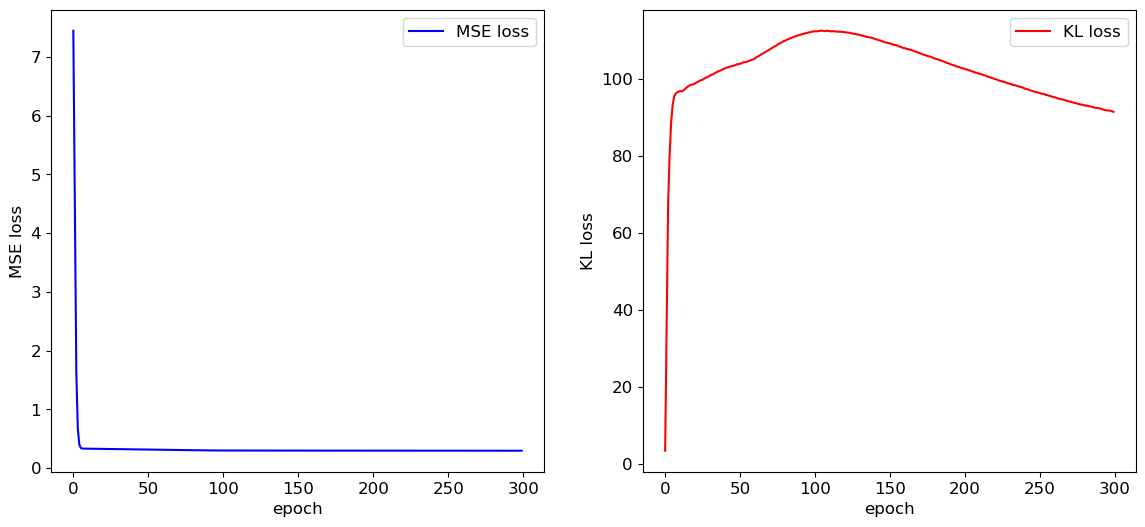

In [17]:
plt.rcParams['font.size'] = 12
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(fit.history['loss'],label="MSE loss",c="b")
ax.set_xlabel('epoch')
ax.set_ylabel("MSE loss")
ax.legend()
ax=AX[1]
ax.plot(fit.history['kl_loss'],label="KL loss",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("KL loss")
ax.legend()

## Evaluate performance
We'll now use the test set to explore the latent space distribution of data and the reconstruction accuracy

In [18]:
encoded_test = np.array(vae.encoder.predict(testset))

63/63 [==============================] - 0s 556us/step


In [19]:
print(encoded_test.shape)

(3, 2000, 4)


z_mean are the first dimension, z_log_var the second (used in training), we're interested in the third dimension, which are the sampled z

In [20]:
dim1 = encoded_test[2,:,:]
print(dim1.shape)

(2000, 4)


Sampling in the latent space is reasonably gaussian as expected

In [21]:
#df = pd.DataFrame(dim1, columns=["x", "y"])
#sns.jointplot(x="x", y="y", data=df);

We can now use the data to decode

In [22]:
decoded_test = np.array(decoder.predict(encoded_test[2,:,:])).reshape(-1,30,3)
print(decoded_test.shape)

63/63 [==============================] - 0s 487us/step
(2000, 30, 3)


#### Check reconstruction

In [23]:
decoded_test[1]

array([[4.5785513 , 0.9328321 , 0.74532354],
       [4.223546  , 0.9237811 , 0.7171817 ],
       [3.4315705 , 0.96951705, 0.7702496 ],
       [4.0871687 , 0.93702537, 0.7355726 ],
       [4.4718227 , 0.90452915, 0.76696205],
       [4.281727  , 0.9379802 , 0.7748167 ],
       [4.156534  , 0.9394301 , 0.7708102 ],
       [4.35873   , 0.92058504, 0.77049446],
       [4.5341887 , 0.93561536, 0.7390809 ],
       [5.099629  , 0.91442555, 0.7369957 ],
       [3.7047498 , 0.9174512 , 0.73399425],
       [4.342086  , 0.9498123 , 0.72154737],
       [3.7197878 , 0.9377023 , 0.762925  ],
       [4.862765  , 0.95541006, 0.76089776],
       [3.7836897 , 0.91667396, 0.73656064],
       [4.390177  , 0.901809  , 0.749162  ],
       [3.9819725 , 0.9452877 , 0.765459  ],
       [4.712918  , 0.9517644 , 0.73986787],
       [4.396649  , 0.9269507 , 0.7685912 ],
       [4.2198014 , 0.9499085 , 0.75359863],
       [4.263721  , 0.9491961 , 0.7316725 ],
       [4.4828787 , 0.9090993 , 0.74619913],
       [3.

In [24]:
ts = testset.reshape(-1,30,3)
print(ts[1,:,:])

[[4.25887924 0.98166059 0.88839667]
 [4.81323888 0.93227694 0.43608879]
 [3.36037763 0.87931542 0.72453921]
 [2.92677474 0.64858892 1.11526007]
 [4.95976329 0.68043168 1.17622794]
 [3.54301813 1.17677662 0.80773329]
 [4.16093888 1.05299323 0.59993389]
 [3.37054438 0.97472606 1.14762674]
 [5.88779072 1.05907447 0.57610052]
 [5.79295745 1.10741491 0.77568108]
 [3.10988387 1.13455545 0.4893028 ]
 [4.1496514  1.11918441 0.31526728]
 [4.14255944 0.74848433 1.46599436]
 [5.60948294 1.24976995 0.91872727]
 [4.36391804 0.6612579  0.31522282]
 [4.31557642 0.78663687 0.65293015]
 [5.07595675 0.97772439 0.710172  ]
 [5.22196863 1.05466596 0.97447703]
 [4.02205053 0.48164571 1.17298908]
 [5.04798724 0.83775398 0.94482053]
 [4.67985116 1.18507339 0.81532008]
 [4.97089745 1.19146249 0.57275513]
 [3.92193941 1.32628126 0.54754058]
 [3.57692344 0.5695975  0.6623943 ]
 [2.50796477 0.72112419 0.51997557]
 [3.6918006  0.86398916 0.33585809]
 [4.64763852 0.56511111 0.78081831]
 [2.49121026 1.04854127 0.95

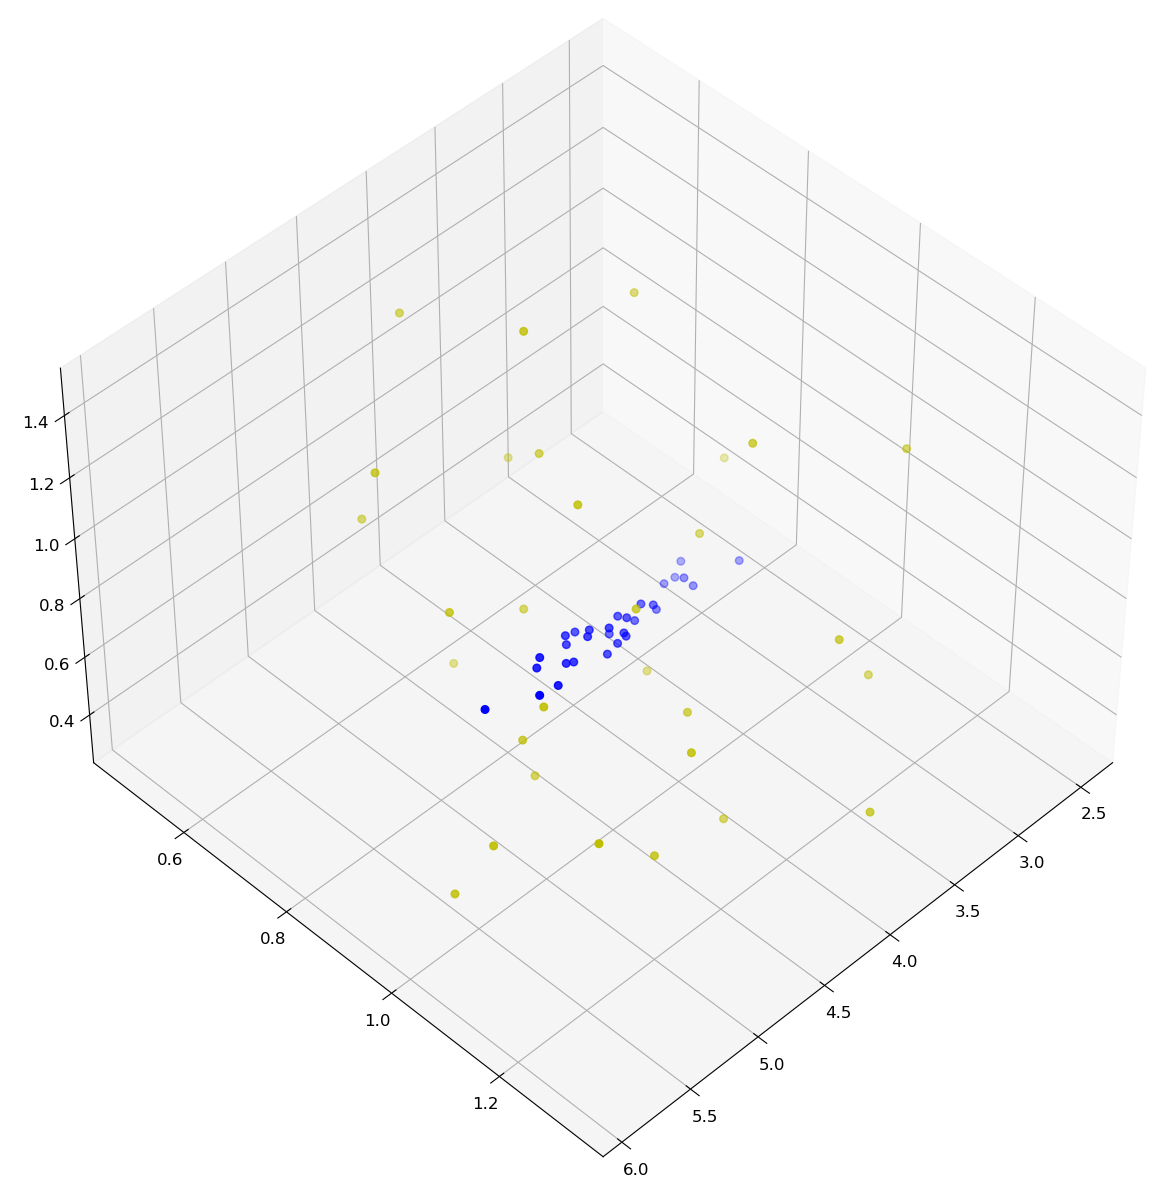

In [25]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(projection='3d')
ax.scatter(decoded_test[1,:,0], decoded_test[1,:,1],decoded_test[1,:,2], s=30, c="b", depthshade=True)
ax.scatter(ts[1,:,0], ts[1,:,1],ts[1,:,2], s=30, c="y", depthshade=True)
ax.view_init(45,45)